# Numerical Errors
## Substractive cancellation

### Cálculo de la diferencia relativa entre dos formas de ćalcular las soluciones a una ecuación cuadrática

In [1]:
#librerías necesarias
import numpy as np
from matplotlib import pyplot as plt

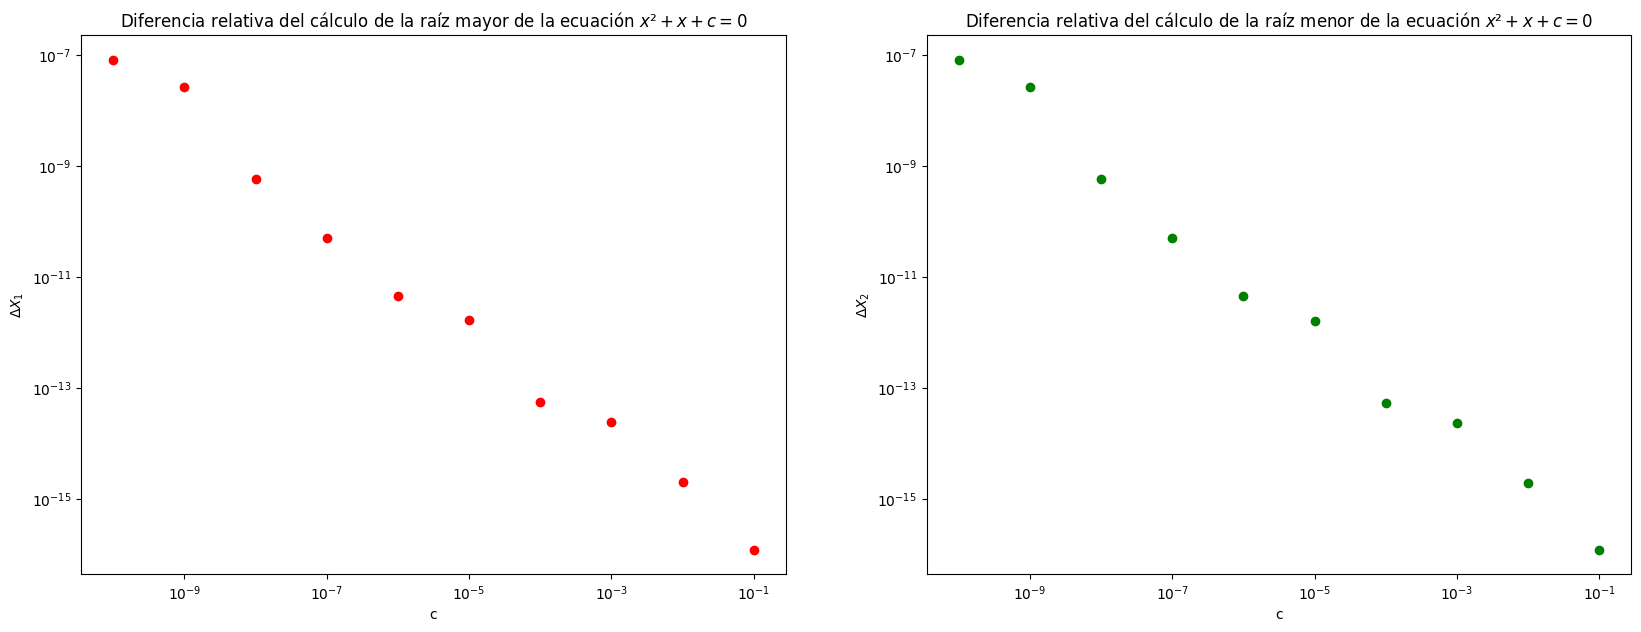

In [2]:
"""
Definición de funciones que retornen la solución a una ecuación cuadrática tomando como argumentos sus coeficientes
y como argumento opcional un entero que controla el signo de la raiz del discriminante usada en la solución, por defecto
su valor es 0. En el caso de que dicho entero sea par se toma la raiz positiva y en caso contrario se toma la raiz negativa.
"""

def sol1(c, b, a, sign=0):
    return (-b+((-1)**sign)*np.sqrt(b**2-4*a*c))/(2*a)

def sol2(c, b, a, sign=0):
    return -2*c/(b+((-1)**sign)*np.sqrt(b**2-4*a*c))

#Cálculo de la diferencia relativa entre ambas soluciones tomando la raiz positiva y negativa
def diference(c, b=1, a=1): 
    dx1 = abs((sol2(c, b, a) - sol1(c, b, a))/sol2(c, a, b))
    dx2 = abs((sol2(c, b, a, 1) - sol1(c, b, a, 1))/sol2(c, a, b, 1))
    return dx1, dx2

#Rango de valores que tomará el coeficiente c
c = 10**(-np.linspace(1, 10, 10))


#Creación y guardado de las gráficas
fig = plt.figure(figsize=(20,7))

fig.add_subplot(1, 2, 1)
plt.loglog(c, diference(c)[0], "or")
plt.ylabel(r"$\Delta X_1$")
plt.xlabel(r"c")
plt.title(r"Diferencia relativa del cálculo de la raíz mayor de la ecuación $x²+x+c=0$")

fig.add_subplot(1, 2, 2)
plt.loglog(c, diference(c)[1], "og")
plt.ylabel(r"$\Delta X_2$")
plt.xlabel(r"c")
plt.title(r"Diferencia relativa del cálculo de la raíz menor de la ecuación $x²+x+c=0$")

plt.savefig("DiferenciasRelativas.pdf")


En las graficas se observa que la diferencia relativa entre las diferentes formas de realizar el cálculo de las raices de una función cuadrática tiene una relación potencial con el valor del término independiente de dicha función, esto se evidencia por el comportamiento lineal que muestra al graficar las magnitudes en una escala log-log

Restar valores cercanos genera errores relativos muy grandes, por lo que en este caso, dado que el coeficiente b es positivo, y ya que el valor de la raiz del discriminante es cercano a b, la mejor forma de reducir el error en el calculo de las soluciones es tomar las soluciones en las que el signo que precede a b es el mismo signo de la raiz del discriminante usada. Es decir, en la primera soución de x, donde se toma la raiz positiva del discriminante, usar la segunda fórmula propuesta y en la segunda solución, donde se toma el valor negativo de la raiz discriminante, usar la ecuación más conocida para el cálculo de las raíces de una ecuación cuadrática, donde b aparece precedida de un signo menos.

### Arreglando una expresión matemática

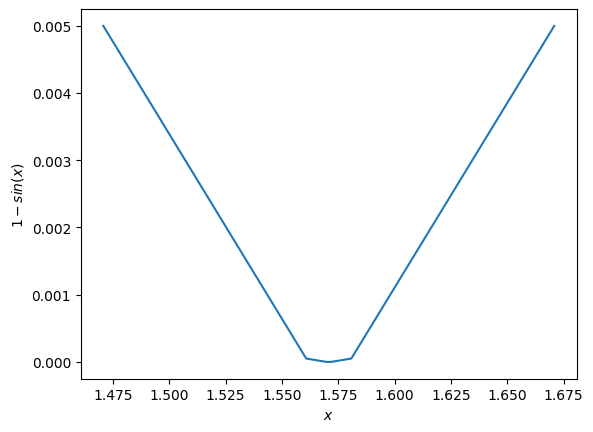

In [3]:
#Se crea el arreglo con los valores de x graficar
exp = 10**(-np.linspace(1, 10, 10))
x = np.zeros(20)+np.pi/2
x[:10] -= exp
x[10:] += exp[::-1]

#Se crea la función
def f(x):
    return 1-np.sin(x)

plt.plot(x, f(x))
plt.xlabel(r"$x$")
plt.ylabel(r"$1-sin(x)$")
plt.show()

La muestra de datos tiene muchos puntos acumulados en el centro del intervalo, por lo que para visualizarlos mejor se grafica la parte derecha de dicho intervalo trasladado para centrarse en 0 y en escala logaritmic. La parte izquierda del intervalo toma valores negativos, por lo cual es imposible de representar en escala logaritmica, escala quie nos ayudará a visialzar mejor el comportamiento de la funciuón.

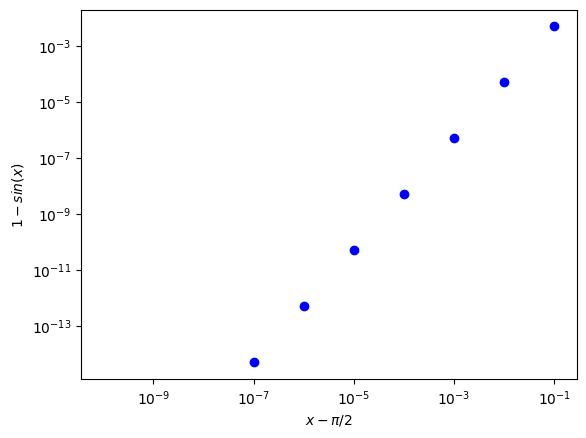

In [4]:
plt.loglog(x[10:]-np.pi/2, f(x)[10:], "ob")
plt.xlabel(r"$x-\pi/2$")
plt.ylabel(r"$1-sin(x)$")
plt.show()

Parece que faltan 3 datos al inicio de la gráfica. A continuación se imprimen los valores de la función graficados para observar lo que sucede.

In [5]:
print(f(x)[10:])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.99600361e-15
 5.00044450e-13 5.00000041e-11 4.99999997e-09 4.99999958e-07
 4.99995833e-05 4.99583472e-03]


Al imprimir los valores de la función en el intervalo de la gráfica se observa que los primeros 3 han sido redondeados a 0, por lo que son invisibles en la escala log-log.
Ahora se intenta graficar la misma función a partir de una equivalencia matemática.

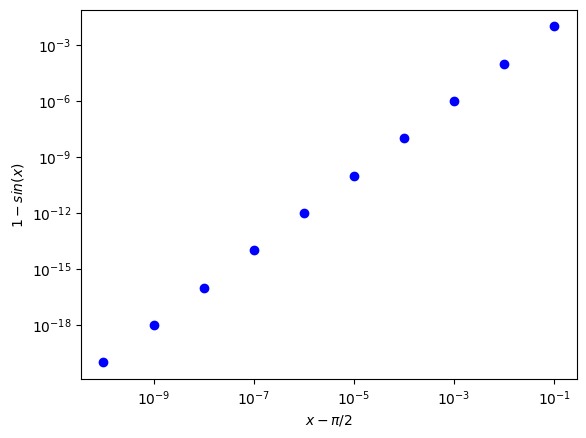

In [7]:
#función equivalente
def g(x):
    return np.cos(x)**2/(1*np.sin(x))

plt.loglog(x[10:]-np.pi/2, g(x)[10:], "ob")
plt.xlabel(r"$x-\pi/2$")
plt.ylabel(r"$1-sin(x)$")
plt.savefig("FunciónArreglada.pdf")

En esta última figura se observa que se grafican los 10 puntos del intervalo, por lo que se muestra que esta fŕomula equivalente, la cual no realiza restas de numeros muy cercanos, cálcula con menor error la función para valores muy cercanos a pi/2. La reducción del error se evidencia al saber que esta función en el intervalo estrudiado es muy cercana a 0, sin embargo es positiva en todo momento a excepción del punto x=pi/2, por lo que la última fórmula muestra ser mejor que la anterior.

Una inspección rápida a la gráfica en escala log-log muestra que la función se corporta lineal en dicha escala, además de que por la misma inspección se puede deducir que su pendiente es cercana a 2. Este hecho es de esperarse, dado que el cuadrático es el primer término no nulo de la expansión de esta función en series de Taylor al rededor de pi/2.